In [379]:
#%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from numpy.linalg import eig

# 'PCA' function to perform principal component analysis using the sklearn library
from sklearn.decomposition import PCA

# 'LDA' function to perform linear discriminant analysis using the sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# import decision tree classifier and random forest classifier from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [380]:
sales_df = pd.read_csv("sales_data_sample.csv", sep=",", encoding='Latin-1')

In [381]:
sales_df.head(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [382]:
sales_df.shape

(2823, 25)

In [383]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [384]:
sales_df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [385]:
sales_df = sales_df[sales_df.duplicated(['ORDERNUMBER'], keep=False)]

In [386]:
sales_df.shape

(2807, 25)

In [387]:
def impute(colname):
    colmode = sales_df[colname].mode()[0]
    sales_df[colname] = sales_df[colname].fillna(colmode)

In [388]:
impute('STATE')
impute('POSTALCODE')
impute('TERRITORY')

In [389]:
sales_df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2506
CITY                   0
STATE                  0
POSTALCODE             0
COUNTRY                0
TERRITORY              0
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [390]:
sales_df = sales_df.drop("ADDRESSLINE2", axis=1)
sales_df = sales_df.drop("ORDERDATE", axis=1)
sales_df = sales_df.drop("PHONE", axis=1)

In [391]:
sales_df['STATUS']=sales_df['STATUS'].apply(lambda x: 1 if x=="Shipped" else 0)
sales_df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,...,CUSTOMERNAME,ADDRESSLINE1,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,1,1,2,2003,Motorcycles,...,Land of Toys Inc.,897 Long Airport Avenue,NYC,NY,10022,USA,EMEA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,1,2,5,2003,Motorcycles,...,Reims Collectables,59 rue de l'Abbaye,Reims,CA,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,1,3,7,2003,Motorcycles,...,Lyon Souveniers,27 rue du Colonel Pierre Avia,Paris,CA,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,1,3,8,2003,Motorcycles,...,Toys4GrownUps.com,78934 Hillside Dr.,Pasadena,CA,90003,USA,EMEA,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,1,4,10,2003,Motorcycles,...,Corporate Gift Ideas Co.,7734 Strong St.,San Francisco,CA,28034,USA,EMEA,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,1,4,12,2004,Ships,...,Euro Shopping Channel,"C/ Moralzarzal, 86",Madrid,CA,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1,1,1,2005,Ships,...,"Oulu Toy Supplies, Inc.",Torikatu 38,Oulu,CA,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,0,1,3,2005,Ships,...,Euro Shopping Channel,"C/ Moralzarzal, 86",Madrid,CA,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,1,1,3,2005,Ships,...,Alpha Cognac,1 rue Alsace-Lorraine,Toulouse,CA,31000,France,EMEA,Roulet,Annette,Small


In [392]:
sales_df[['PRODUCTLINE']] = sales_df[['PRODUCTLINE']].apply(lambda col:pd.Categorical(col).codes)
sales_df[['STATE']] = sales_df[['STATE']].apply(lambda col:pd.Categorical(col).codes)
sales_df[['COUNTRY']] = sales_df[['COUNTRY']].apply(lambda col:pd.Categorical(col).codes)
sales_df[['TERRITORY']] = sales_df[['TERRITORY']].apply(lambda col:pd.Categorical(col).codes)
sales_df[['DEALSIZE']] = sales_df[['DEALSIZE']].apply(lambda col:pd.Categorical(col).codes)
sales_df[['QTR_ID']] = sales_df[['QTR_ID']].apply(lambda col:pd.Categorical(col).codes)
sales_df[['MONTH_ID']] = sales_df[['MONTH_ID']].apply(lambda col:pd.Categorical(col).codes)
sales_df[['YEAR_ID']] = sales_df[['YEAR_ID']].apply(lambda col:pd.Categorical(col).codes)
sales_df = pd.get_dummies(sales_df, columns=['PRODUCTLINE','STATE','COUNTRY','COUNTRY','TERRITORY','DEALSIZE','QTR_ID','MONTH_ID','YEAR_ID'])

In [393]:
sales_df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,MSRP,PRODUCTCODE,CUSTOMERNAME,ADDRESSLINE1,...,MONTH_ID_5,MONTH_ID_6,MONTH_ID_7,MONTH_ID_8,MONTH_ID_9,MONTH_ID_10,MONTH_ID_11,YEAR_ID_0,YEAR_ID_1,YEAR_ID_2
0,10107,30,95.70,2,2871.00,1,95,S10_1678,Land of Toys Inc.,897 Long Airport Avenue,...,0,0,0,0,0,0,0,1,0,0
1,10121,34,81.35,5,2765.90,1,95,S10_1678,Reims Collectables,59 rue de l'Abbaye,...,0,0,0,0,0,0,0,1,0,0
2,10134,41,94.74,2,3884.34,1,95,S10_1678,Lyon Souveniers,27 rue du Colonel Pierre Avia,...,0,1,0,0,0,0,0,1,0,0
3,10145,45,83.26,6,3746.70,1,95,S10_1678,Toys4GrownUps.com,78934 Hillside Dr.,...,0,0,1,0,0,0,0,1,0,0
4,10159,49,100.00,14,5205.27,1,95,S10_1678,Corporate Gift Ideas Co.,7734 Strong St.,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,1,54,S72_3212,Euro Shopping Channel,"C/ Moralzarzal, 86",...,0,0,0,0,0,0,1,0,1,0
2819,10373,29,100.00,1,3978.51,1,54,S72_3212,"Oulu Toy Supplies, Inc.",Torikatu 38,...,0,0,0,0,0,0,0,0,0,1
2820,10386,43,100.00,4,5417.57,0,54,S72_3212,Euro Shopping Channel,"C/ Moralzarzal, 86",...,0,0,0,0,0,0,0,0,0,1
2821,10397,34,62.24,1,2116.16,1,54,S72_3212,Alpha Cognac,1 rue Alsace-Lorraine,...,0,0,0,0,0,0,0,0,0,1


In [394]:
sales_df = sales_df.drop("PRODUCTCODE", axis=1)
sales_df = sales_df.drop("CUSTOMERNAME", axis=1)
sales_df = sales_df.drop("ADDRESSLINE1", axis=1)
sales_df = sales_df.drop("CITY", axis=1)
sales_df = sales_df.drop("POSTALCODE", axis=1)
sales_df = sales_df.drop("CONTACTLASTNAME", axis=1)
sales_df = sales_df.drop("CONTACTFIRSTNAME", axis=1)
sales_df = sales_df.drop("ORDERNUMBER", axis=1)

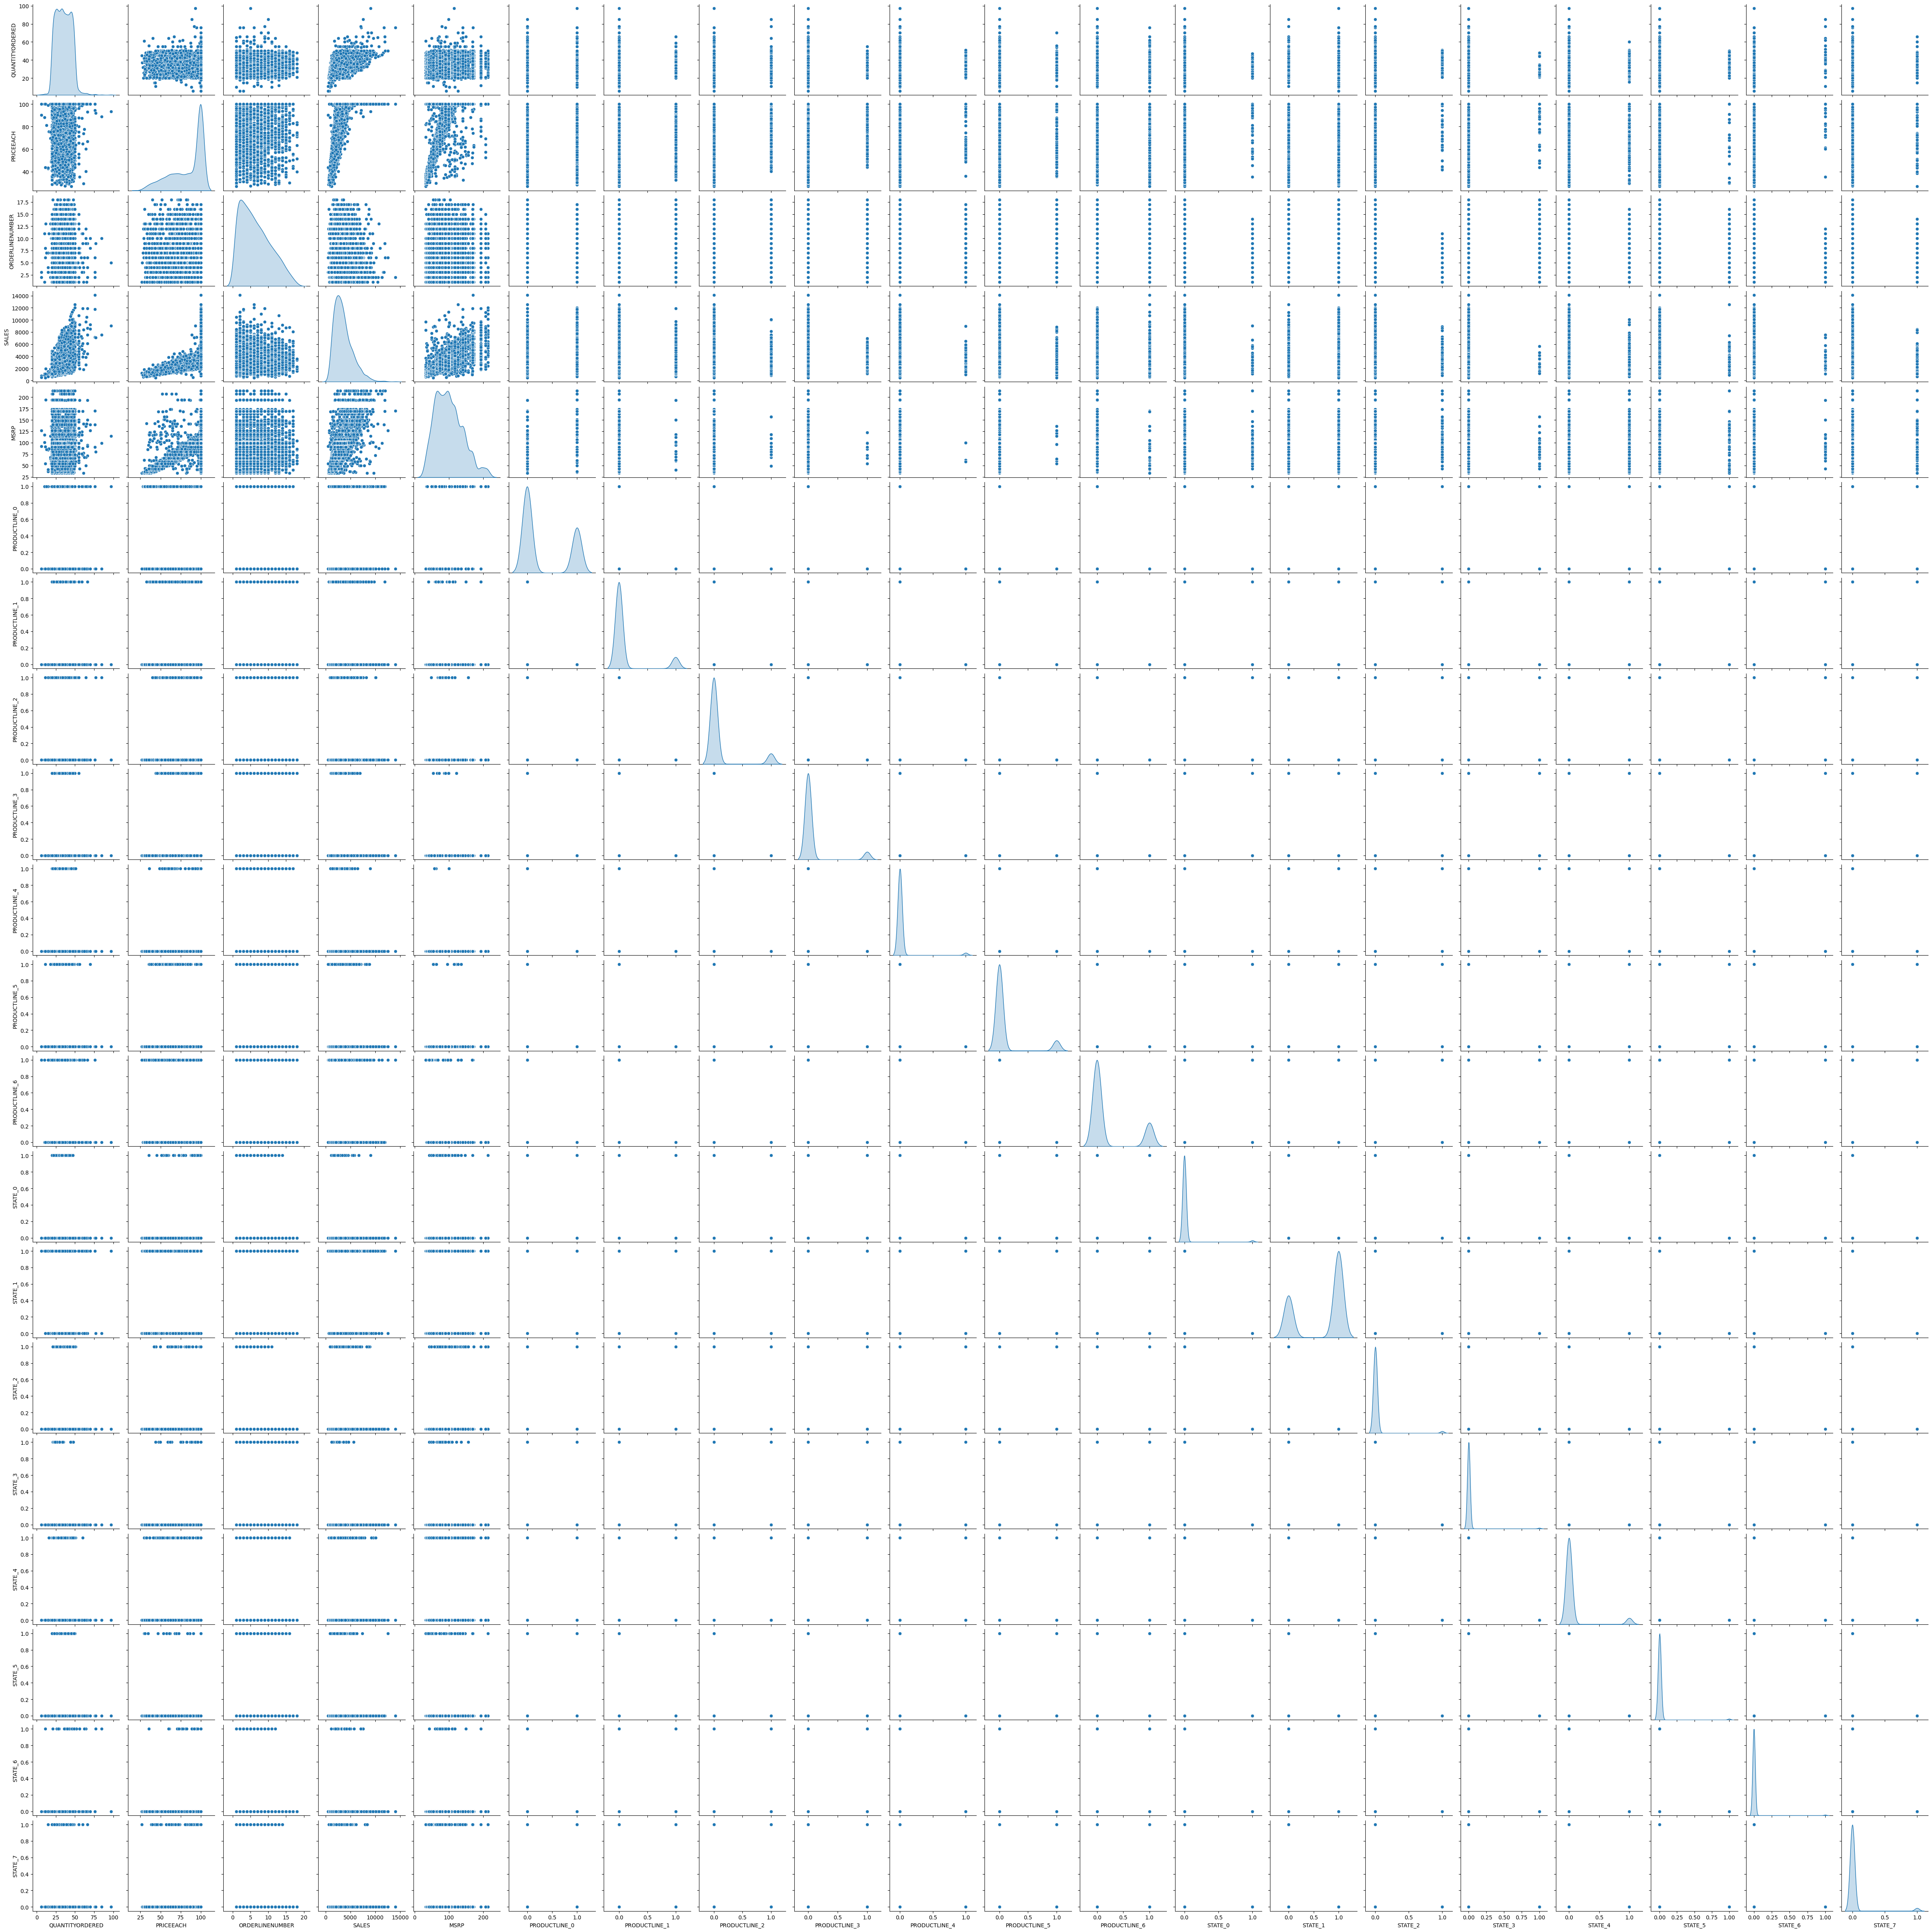

In [316]:
#sales_df.hist()
# adjust the subplots
#plt.tight_layout()
# display the plot
#plt.show()

sales_attr = (sales_df.drop("STATUS", axis=1)).iloc[:, 0:20]
sns.pairplot(sales_attr, diag_kind='kde')

In [396]:
# Standardize data to the center
sales_std = StandardScaler().fit_transform(sales_df.drop('STATUS', axis = 1))

# create a dataframe of scaled data
df_std = pd.DataFrame(sales_std, columns = sales_df.drop('STATUS', axis = 1).columns)

# check the mean and standard deviation of each variable
print('Mean: \n', round(df_std.mean()))
print('\n')
print('Standard Deviation: \n', round(df_std.std()))

Mean: 
 QUANTITYORDERED    0.0
PRICEEACH          0.0
ORDERLINENUMBER   -0.0
SALES              0.0
MSRP               0.0
                  ... 
MONTH_ID_10        0.0
MONTH_ID_11        0.0
YEAR_ID_0         -0.0
YEAR_ID_1         -0.0
YEAR_ID_2          0.0
Length: 91, dtype: float64


Standard Deviation: 
 QUANTITYORDERED    1.0
PRICEEACH          1.0
ORDERLINENUMBER    1.0
SALES              1.0
MSRP               1.0
                  ... 
MONTH_ID_10        1.0
MONTH_ID_11        1.0
YEAR_ID_0          1.0
YEAR_ID_1          1.0
YEAR_ID_2          1.0
Length: 91, dtype: float64


In [397]:
# Create the covariance matrix of standardized data
covariance_mat = np.cov(df_std.T)
covariance_mat.shape
covariance_mat[0:5]

array([[ 1.00035638e+00,  5.16748633e-03, -1.89507328e-02,
         5.52098264e-01,  1.78667846e-02,  4.73993017e-03,
         4.76951368e-03, -1.43792192e-03, -1.27890845e-02,
         3.99452575e-03,  2.43105288e-02, -1.94050517e-02,
        -3.06535772e-02,  2.88590181e-02,  1.61012053e-02,
        -6.68176438e-03, -2.93692169e-03,  1.83126888e-02,
         7.17633244e-02, -3.26411134e-02, -3.21287497e-02,
        -5.26359905e-03, -4.31448561e-03, -2.79539614e-02,
        -2.28686838e-02,  9.31712115e-03,  1.64674071e-02,
        -2.37053405e-02, -3.63886457e-02,  1.15455478e-02,
        -2.13490875e-02, -3.84177728e-02, -3.46794850e-03,
        -7.56679756e-03,  4.47061697e-03, -6.95715932e-03,
        -3.47709455e-02, -3.58990057e-02,  1.01682097e-02,
        -2.75019690e-02,  1.85300940e-02, -3.22145204e-03,
         4.76421705e-02,  1.43669537e-03, -3.49129837e-03,
        -6.76766963e-03,  3.12802100e-02, -3.63886457e-02,
         1.15455478e-02, -2.13490875e-02, -3.84177728e-0

In [398]:
''' The pair plot and covariance matrix show that PRICEEACH, SALES, MSRP are strongly 
correlated (as expected) and PCA would be effective on them. '''

' The pair plot and covariance matrix show that PRICEEACH, SALES, MSRP are strongly \ncorrelated (as expected) and PCA would be effective on them. '

In [399]:
#Calculate eigen values and vectors from covariance matrix
eigenvalue, eigenvector = np.linalg.eig(covariance_mat)

# print the eigenvalues
print('Eigenvalues: \n',eigenvalue,"\n")

# print the eigenvectors
print('Eigenvectors: \n',eigenvector,'\n')

Eigenvalues: 
 [ 5.08142155e+00+0.00000000e+00j  4.01421494e+00+0.00000000e+00j
  3.92210610e+00+0.00000000e+00j  3.75614937e+00+0.00000000e+00j
  3.32839198e+00+0.00000000e+00j  3.26616207e+00+0.00000000e+00j
  3.00870912e+00+0.00000000e+00j  2.71023099e+00+0.00000000e+00j
  2.51384277e+00+0.00000000e+00j  2.41783528e+00+0.00000000e+00j
  2.39557123e+00+0.00000000e+00j  2.29312156e+00+0.00000000e+00j
  2.26715665e+00+0.00000000e+00j  2.22558468e+00+0.00000000e+00j
  2.16919623e+00+0.00000000e+00j  2.12394376e+00+0.00000000e+00j
  2.10175208e+00+0.00000000e+00j  2.05974401e+00+0.00000000e+00j
  2.06769334e+00+0.00000000e+00j  1.93919801e+00+0.00000000e+00j
  1.86433373e+00+0.00000000e+00j  1.71534729e+00+0.00000000e+00j
  7.00157538e-02+0.00000000e+00j  2.41148836e-01+0.00000000e+00j
  1.80397429e-01+0.00000000e+00j  2.92997855e-01+0.00000000e+00j
  1.54808983e+00+0.00000000e+00j  1.50995027e+00+0.00000000e+00j
  1.42977590e+00+0.00000000e+00j  4.74881601e-01+0.00000000e+00j
  5.023170

In [402]:
list_eigenvalue = eigenvalue.tolist()

In [403]:
# Calculate percentage of variation for each component
percent_var = []

for i in list_eigenvalue:
    variation = i/sum(list_eigenvalue)*100
    
    # add the values to the list 'percent_var'
    percent_var.append(variation)
    
# print the percentage of variation
percent_var

[(5.581990416785592+0j),
 (4.409653695090243+0j),
 (4.308471259097592+0j),
 (4.126166185741917+0j),
 (3.656270586512235+0j),
 (3.5879104292315103+0j),
 (3.305095890226299+0j),
 (2.977214799187004+0j),
 (2.761480452589794+0j),
 (2.6560152969195774+0j),
 (2.631558024260831+0j),
 (2.5190160788629297+0j),
 (2.490493371675185+0j),
 (2.4448261608385975+0j),
 (2.382882907008903+0j),
 (2.333172637290412+0j),
 (2.3087948613962475+0j),
 (2.262648590699313+0j),
 (2.27138101387892+0j),
 (2.1302276577780006+0j),
 (2.047988527599727+0j),
 (1.8843254897082353+0j),
 (0.07691297864292361+0j),
 (0.2649043148769099+0j),
 (0.1981683100056977+0j),
 (0.32186096022057553+0j),
 (1.7005915645906113+0j),
 (1.65869488811835+0j),
 (1.5706225652063341+0j),
 (0.5216620040192463+0j),
 (0.551800087277046+0j),
 (1.4285120572105616+0j),
 (1.4230400968480617+0j),
 (1.3749471558247492+0j),
 (1.3622758769627152+0j),
 (0.7384201345276553+0j),
 (1.276771368221722+0j),
 (0.7797436849000439+0j),
 (0.7886661417017332+0j),
 (0.

In [404]:
'''The first 4 values explain around 90% of the variance and therefore, the last 4 elements are taken'''

'The first 4 values explain around 90% of the variance and therefore, the last 4 elements are taken'

In [405]:
eig_vec_4 = eigenvector[:,0:4]
eig_vec_4

array([[ 3.11119353e-02+0.j,  3.11986558e-02+0.j, -2.15641048e-01+0.j,
         1.37136484e-02+0.j],
       [ 2.98124172e-02+0.j, -1.21482293e-04+0.j, -3.84020038e-01+0.j,
         1.76346747e-02+0.j],
       [-2.18104149e-03+0.j,  1.56677579e-02+0.j,  3.63729342e-02+0.j,
        -8.05337428e-03+0.j],
       [ 4.00197821e-02+0.j,  2.16154273e-02+0.j, -4.46212886e-01+0.j,
         2.47068284e-02+0.j],
       [ 2.65012699e-02+0.j,  5.11263960e-03+0.j, -3.73007692e-01+0.j,
         1.91469081e-02+0.j],
       [ 3.25862890e-02+0.j,  2.27979362e-03+0.j, -1.64304844e-01+0.j,
         4.35230788e-02+0.j],
       [-8.12054825e-03+0.j, -1.56394824e-02+0.j, -1.66258453e-03+0.j,
        -3.85680375e-02+0.j],
       [-2.69209410e-02+0.j,  3.36425705e-02+0.j,  5.80833975e-02+0.j,
        -3.46100658e-02+0.j],
       [ 3.34223702e-02+0.j,  2.27038264e-02+0.j,  6.50157953e-02+0.j,
        -7.33101021e-03+0.j],
       [ 8.19886268e-03+0.j,  2.29586238e-02+0.j,  5.21028195e-02+0.j,
        -8.37211669e

In [406]:
new_data = np.dot(df_std, eig_vec_4)

# create the dataframe using the 'DataFrame()'
# pass the required column names to the parameter 'columns'
df_pca = pd.DataFrame(new_data, columns = ['PC1', 'PC2', 'PC3', 'PC4'])

In [407]:
df_pca.shape

(2807, 4)

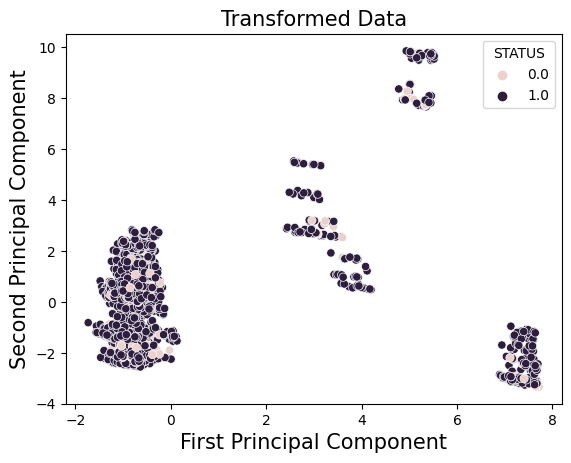

In [408]:
# Apply PCA to dataset
components = 2
pca = PCA(n_components = components, random_state = 42)  

pca_2 = pca.fit_transform(df_std)
df_pca_2 = pd.DataFrame(pca_2, columns = ['PC1', 'PC2'])

# plot a scatterplot to visualize the dataset
# pass the variables on x and y axes to the parameter 'x' and 'y' respectively
# pass the dataframe to the parameter 'data'
# pass the target variable to the parameter 'hue' to display the classes of the target variables with different colors
sns.scatterplot(x = 'PC1', y = 'PC2', data = df_pca_2, hue = sales_df['STATUS'])

# set the plot title and axes labels
# set the text size using 'fontsize'
plt.title('Transformed Data', fontsize = 15)
plt.xlabel('First Principal Component', fontsize = 15)
plt.ylabel('Second Principal Component', fontsize = 15)

# display the plot
plt.show()

In [409]:
'''The plot shows maximum variation along the Second Principal Component'''

'The plot shows maximum variation along the Second Principal Component'

In [410]:
# Extract target column
y = sales_df['STATUS']

# Split dataset into train and test sets
X_train_raw, X_test_raw, y_train, y_test = train_test_split(df_std, y, test_size = 0.2, random_state = 42)

# Check the shape of the train and test sets
print('X_train_raw:', X_train_raw.shape)
print('y_train:', y_train.shape)
print('X_test_raw:', X_test_raw.shape)
print('y_test:', y_test.shape)

X_train_raw: (2245, 91)
y_train: (2245,)
X_test_raw: (562, 91)
y_test: (562,)


In [411]:
#Train an LDA model
lda = LDA(n_components = 1)

X_train_lda = lda.fit_transform(X_train_raw, y_train)
X_test_lda = lda.transform(X_test_raw)

In [412]:
X_train_lda.shape, X_test_lda.shape

((2245, 1), (562, 1))

In [413]:
# Create a RandomForest model
def randomforest_model_run(X_train, X_test, y_train, y_test):
    
    rf_clf = RandomForestClassifier(random_state=1)
    rf_clf.fit(X_train, y_train)
    y_pred = rf_clf.predict(X_test)
    
    # Calculate accuracy for test set
    test_acc = accuracy_score(y_test, y_pred)
    return print('Test Accuracy:', test_acc)

In [414]:
randomforest_model_run(X_train_lda, X_test_lda, y_train, y_test)

Test Accuracy: 0.9288256227758007


In [415]:
# Train on PCA model
pca = PCA(n_components = 2, random_state = 42)  

X_train_pca = pca.fit_transform(X_train_raw)
X_test_pca = pca.transform(X_test_raw)

# Check the dimension of the transformed data
print('Train set:', X_train_pca.shape)
print('Test set:', X_test_pca.shape)

Train set: (2245, 2)
Test set: (562, 2)


In [416]:
randomforest_model_run(X_train_raw, X_test_raw, y_train, y_test)

Test Accuracy: 0.9786476868327402
